In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# RATING OF GUVI COURSE PROJECT

DATA PROCESSING

MODEL TRAINING TESTING AND PREDICTION

# DATA PROCESSING

Load the dataset

Handling missing values

Encoding categorical variables

Scaling numerical variables

Handling outliers

Plotting

Checking for duplicates

Removing irrelevant columns

In [2]:
import pandas as pd
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
Guvi_DF=pd.read_csv("3.1-data-sheet-guvi-courses.csv")
Guvi_DF.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
Guvi_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


# Handling missing values

In [5]:
null_counts = Guvi_DF.isnull().sum()
print(null_counts)

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64


In [6]:
Guvi_DF = Guvi_DF.dropna()
null_counts1 = Guvi_DF.isnull().sum()
print(null_counts1)

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


# Checking for duplicates

In [7]:
# Find duplicate rows
duplicates = Guvi_DF[Guvi_DF.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows: {}".format(len(duplicates)))

Number of duplicate rows: 0


# Removing irrelevant columns

In [8]:
Guvi_DF.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [9]:
# 'course_id', 'published_timestamp', 'url', 'course_title' these columns are not related , so dropping them
Guvi_DF = Guvi_DF.drop(['course_id', 'published_timestamp', 'url','course_title'], axis=1)

In [10]:
Guvi_DF.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,Subject: Web Development


# PLOTTINGS BETWEEN DEPENDENT AND CATEGORICAL INDEPENDENT FEATURES

In [11]:
print(Guvi_DF['subject'].unique())
print(Guvi_DF['level'].unique())

['Subject: Web Development' 'Business Finance' 'Graphic Design'
 'Musical Instruments']
['Beginner Level' 'Expert Level' 'All Levels' 'Intermediate Level']


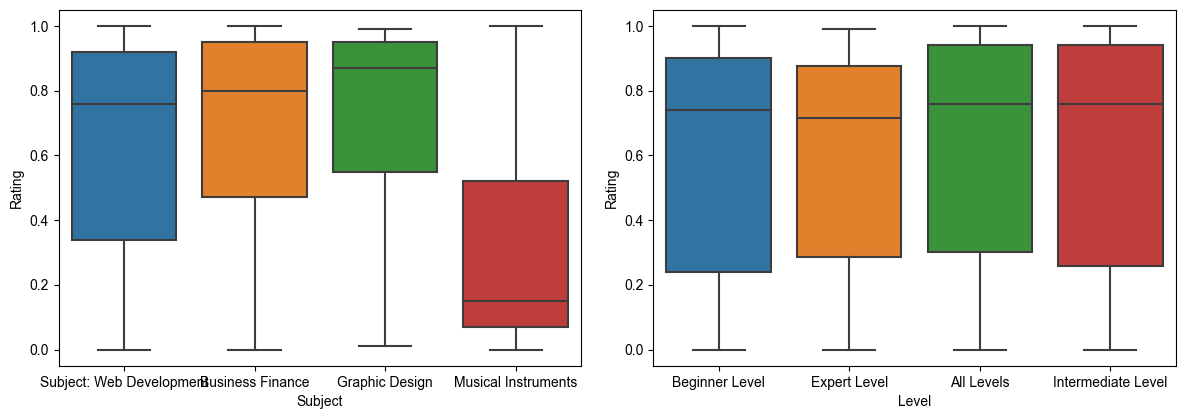

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) # adjust size as needed

# create first subplot for Rating vs. subject
plt.subplot(2, 2, 1)
sns.boxplot(x='subject', y='Rating', data=Guvi_DF)
plt.xlabel('Subject')
plt.ylabel('Rating')

# create third subplot for Rating vs. level
plt.subplot(2, 2, 2)
sns.boxplot(x='level', y='Rating', data=Guvi_DF)
plt.xlabel('Level')
plt.ylabel('Rating')

sns.set_style("ticks")
plt.tight_layout() # adjust spacing between subplots
plt.show()

# PLOTTINGS BETWEEN DEPENDENT AND NUMERICAL INDEPENDENT FEATURES

In [13]:
# price, num_subscribers, num_reviews, num_lectures,content_duration are independent features
# Rating is dependent feature

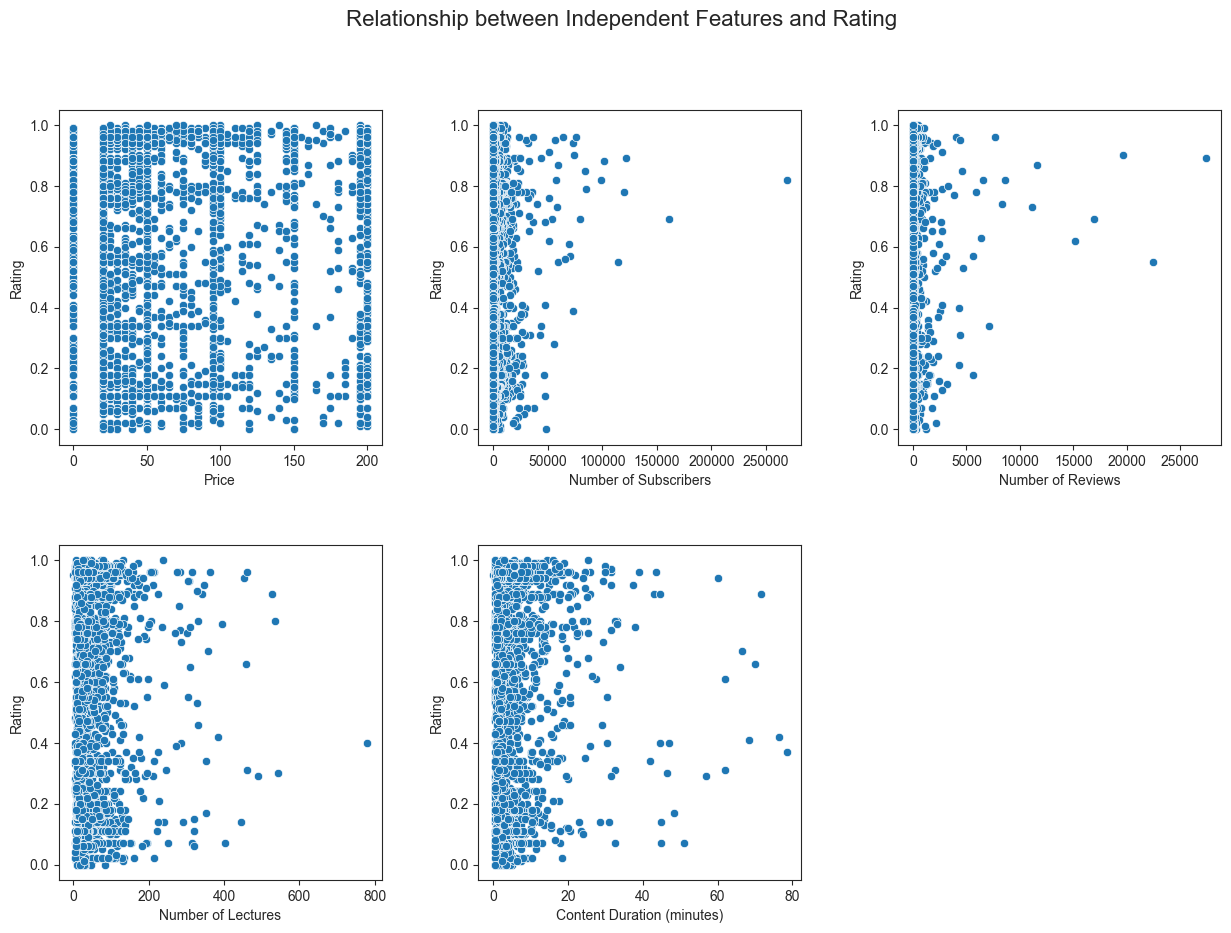

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# create subplots for each pair of features
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# plot scatterplot for each pair of features
sns.scatterplot(x='price', y='Rating', data=Guvi_DF, ax=axs[0][0])
sns.scatterplot(x='num_subscribers', y='Rating', data=Guvi_DF, ax=axs[0][1])
sns.scatterplot(x='num_reviews', y='Rating', data=Guvi_DF, ax=axs[0][2])
sns.scatterplot(x='num_lectures', y='Rating', data=Guvi_DF, ax=axs[1][0])
sns.scatterplot(x='content_duration', y='Rating', data=Guvi_DF, ax=axs[1][1])

# remove empty subplot
fig.delaxes(axs[1][2])

# adjust labels and title
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Rating')
axs[0][1].set_xlabel('Number of Subscribers')
axs[0][1].set_ylabel('Rating')
axs[0][2].set_xlabel('Number of Reviews')
axs[0][2].set_ylabel('Rating')
axs[1][0].set_xlabel('Number of Lectures')
axs[1][0].set_ylabel('Rating')
axs[1][1].set_xlabel('Content Duration (minutes)')
axs[1][1].set_ylabel('Rating')
fig.suptitle('Relationship between Independent Features and Rating', fontsize=16)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

HEAT MAP

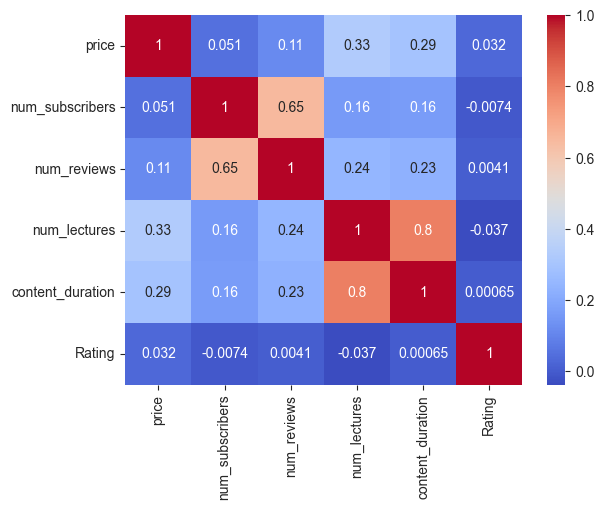

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# select the relevant columns
cols = ['price', 'num_subscribers','num_reviews', 'num_lectures', 'content_duration', 'Rating']
df = Guvi_DF[cols]

# create a correlation matrix
corr_matrix = df.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

# Encoding categorical variables

In [16]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# encode the 'subject' column
Guvi_DF['subject'] = le.fit_transform(Guvi_DF['subject'])

In [17]:
level_map = {
    'Beginner Level': 1,
    'Intermediate Level': 2,
    'Expert Level': 3,
    'All Levels': 4
}

Guvi_DF['level'] = Guvi_DF['level'].map(level_map)

In [18]:
Guvi_DF.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,1,0.82,10.5,3
1,0.0,161029.0,279.0,27.0,3,0.69,3.5,3
2,200.0,121584.0,27445.0,342.0,1,0.89,43.0,3
3,0.0,120291.0,5924.0,30.0,4,0.78,3.0,3
4,200.0,114512.0,22412.0,304.0,1,0.55,30.5,3


# Handling outliers

In [19]:
# PLOT THE OUTLIERS

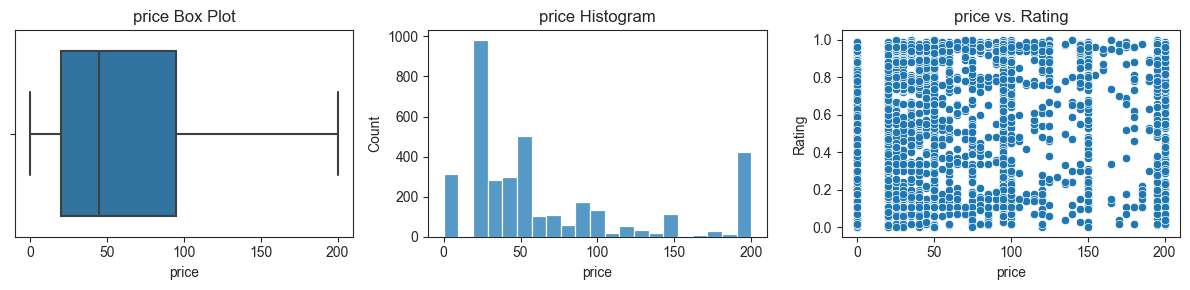

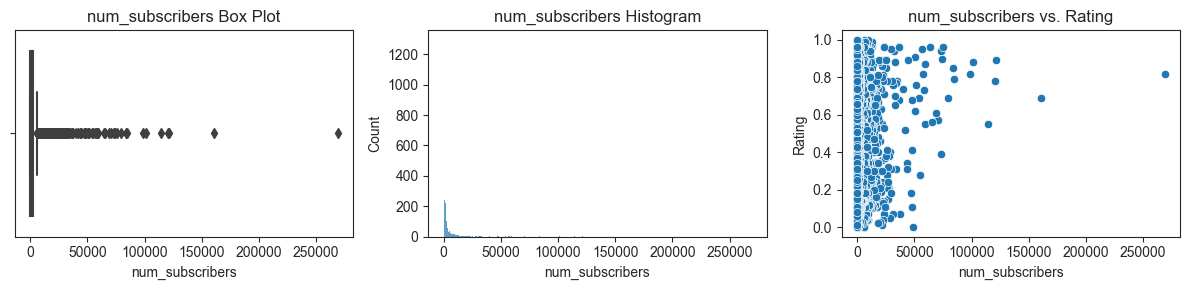

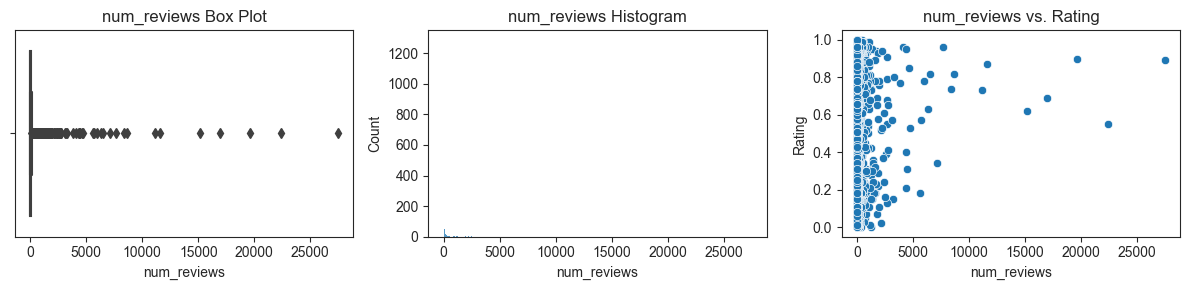

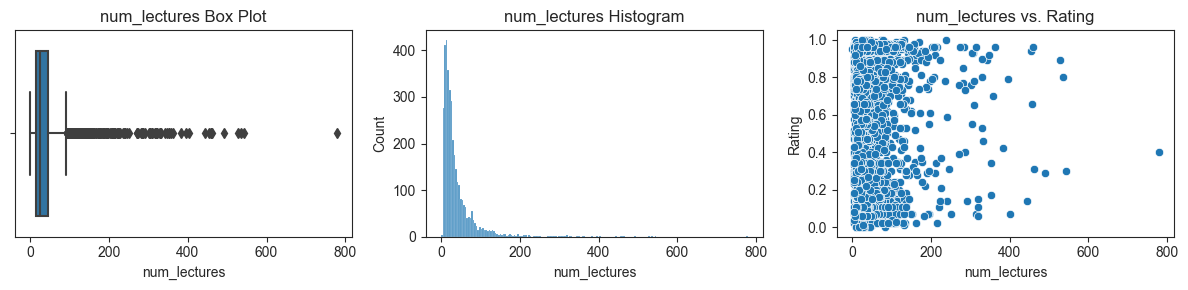

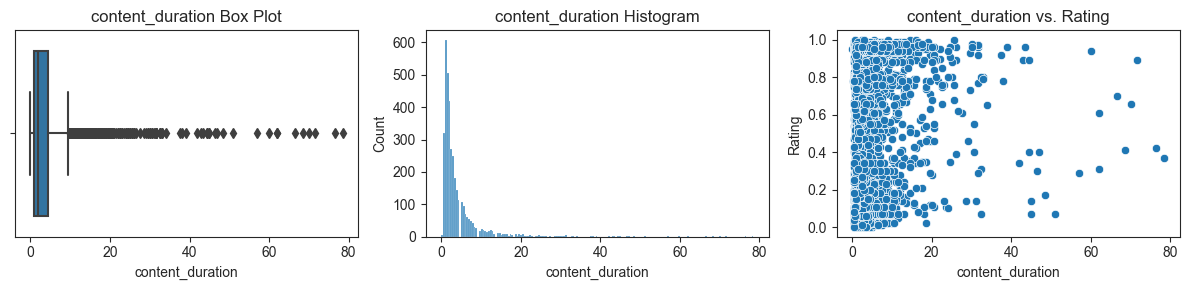

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

# Loop through each numerical column and create a boxplot, histogram, and scatterplot
for col in num_cols:
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    # Boxplot
    sns.boxplot(x=Guvi_DF[col], ax=axs[0])
    axs[0].set_title(col + ' Box Plot')
    
    # Histogram
    sns.histplot(x=Guvi_DF[col], ax=axs[1])
    axs[1].set_title(col + ' Histogram')
    
    # Scatterplot
    sns.scatterplot(x=Guvi_DF[col], y=Guvi_DF['Rating'], ax=axs[2])
    axs[2].set_title(col + ' vs. Rating')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
# HERE WE CAN CLEARLY SEE FROM VARIOUS PLOTS (BOX, HISTOGRAM, SCATTER) THAT THERE ARE OUTLIERS
# PRESENT AND WE NEED TO DEAL WITH THEM

In [ ]:
# FIND TOTAL OUTLIERS

In [21]:
import numpy as np

# Define a function to calculate outliers using the IQR method
def calculate_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Loop through each numerical column and calculate outliers using the IQR method
for col in num_cols:
    outliers = calculate_outliers_iqr(Guvi_DF[col])
    num_outliers = len(outliers)
    percent_outliers = num_outliers / len(Guvi_DF) * 100
    print(col + ': ' + str(num_outliers) + ' outliers, ' + str(round(percent_outliers, 2)) + '%')


price: 0 outliers, 0.0%
num_subscribers: 434 outliers, 11.81%
num_reviews: 494 outliers, 13.44%
num_lectures: 291 outliers, 7.92%
content_duration: 313 outliers, 8.51%


In [22]:
# HANDLE OUTLIERS
# LOG TRANSFORMING

In [23]:
import numpy as np
import pandas as pd

# columns num_subscribers, num_reviews, num_lectures, content_duration and Rating

# Apply log transformation to the columns with numerical values
cols_to_transform = [ 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
Guvi_DF[cols_to_transform] = Guvi_DF[cols_to_transform].apply(lambda x: np.log(x + 1))

# View the transformed data
print(Guvi_DF.head())

   price  num_subscribers  num_reviews  num_lectures  level  Rating  \
0    0.0        12.502184     9.063000      3.828641      1    0.82   
1    0.0        11.989346     5.634790      3.332205      3    0.69   
2  200.0        11.708369    10.219976      5.837730      1    0.89   
3    0.0        11.697677     8.686936      3.433987      4    0.78   
4  200.0        11.648444    10.017396      5.720312      1    0.55   

   content_duration  subject  
0          2.442347        3  
1          1.504077        3  
2          3.784190        3  
3          1.386294        3  
4          3.449988        3  


PLOTTING AFTER OULIER HANDLING

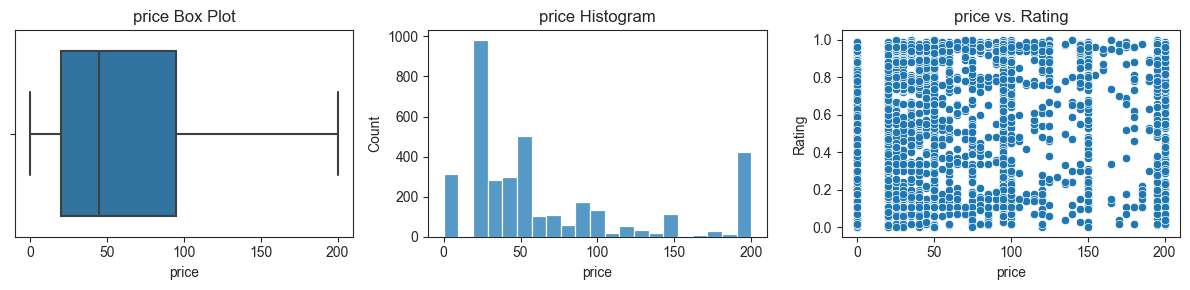

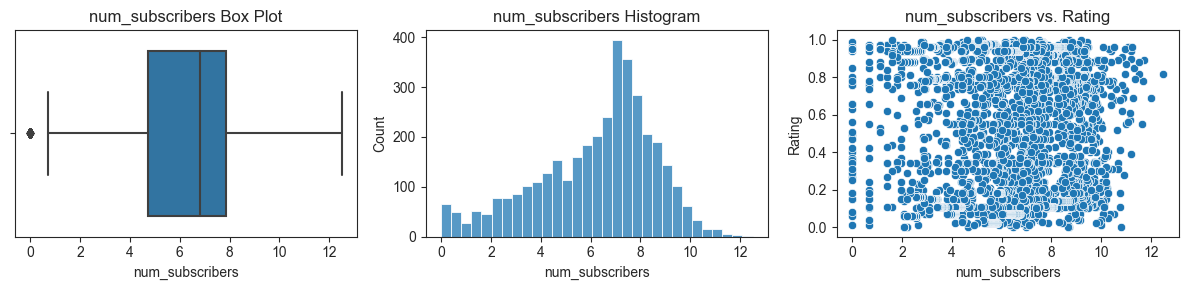

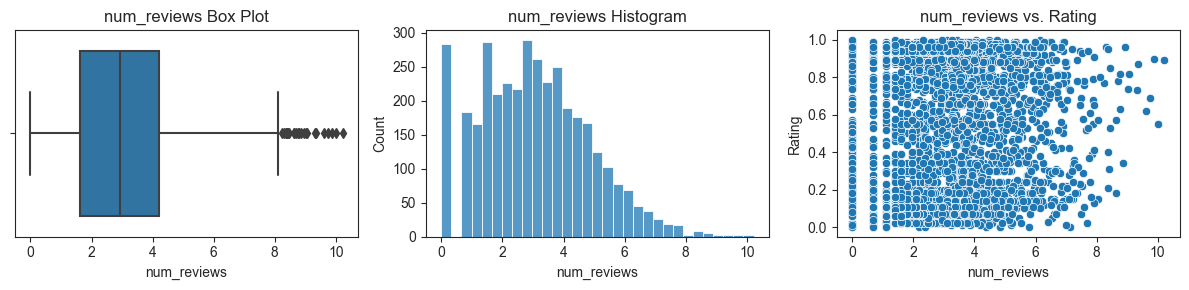

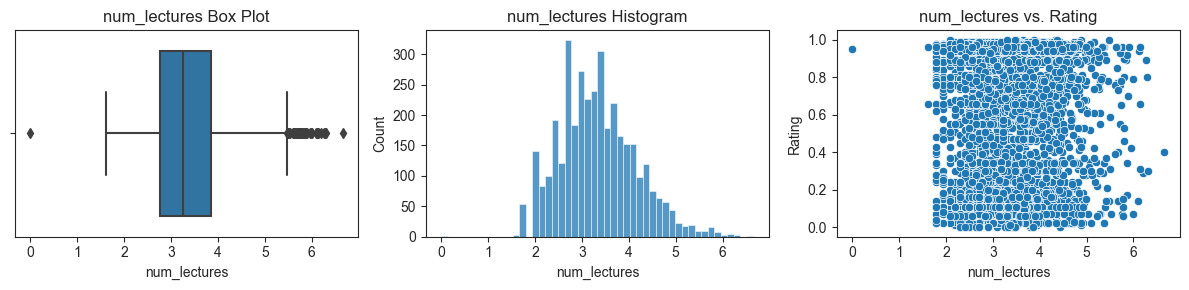

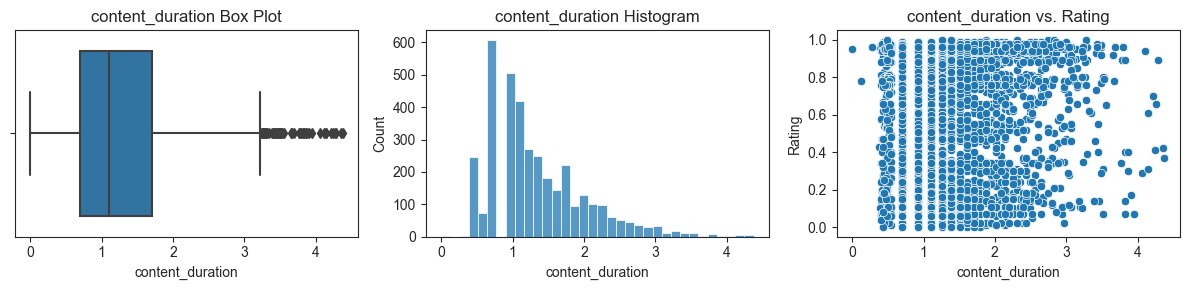

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

# Loop through each numerical column and create a boxplot, histogram, and scatterplot
for col in num_cols:
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    # Boxplot
    sns.boxplot(x=Guvi_DF[col], ax=axs[0])
    axs[0].set_title(col + ' Box Plot')
    
    # Histogram
    sns.histplot(x=Guvi_DF[col], ax=axs[1])
    axs[1].set_title(col + ' Histogram')
    
    # Scatterplot
    sns.scatterplot(x=Guvi_DF[col], y=Guvi_DF['Rating'], ax=axs[2])
    axs[2].set_title(col + ' vs. Rating')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [25]:
# WE CAN SEE THAT THE DATA IS WITH MINIMUM OUTLIERS AFTER TRANSFORMING

In [26]:
Guvi_DF.head()

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,12.502184,9.063000,3.828641,1,0.82,2.442347,3
1,0.0,11.989346,5.634790,3.332205,3,0.69,1.504077,3
2,200.0,11.708369,10.219976,5.837730,1,0.89,3.784190,3
3,0.0,11.697677,8.686936,3.433987,4,0.78,1.386294,3
4,200.0,11.648444,10.017396,5.720312,1,0.55,3.449988,3


# CHECK FOR MULTICOLLINIARITY

In [27]:
# CHECKING FOR MULTICOLLINIARITY
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only the independent features
X = Guvi_DF[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']]

# Creating a dataframe to store the VIF values
vif_df = pd.DataFrame()

# Calculating VIF for each feature and adding it to the dataframe
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df['Feature'] = X.columns

# Displaying the dataframe
print(vif_df)

         VIF           Feature
0   2.537072             price
1  18.688493   num_subscribers
2  10.813805       num_reviews
3  23.121077      num_lectures
4  12.843584  content_duration


# DATA PRE-PROCESSING AND CLEANING REPORT

Load the dataset

    Dataset contains 3680 rows and 11 columns

Handling missing values

     Dataset contains negligible(< 0.1%) valus so deleting them don't effect the dataset and no loss of information

Checking for duplicates
 
     No duplicate values present 
     

Removing irrelevant columns

     I have deleted irrelevent columns that do not effect target column are course_id, course_title,url,published_timestamp

Plottings


    Plottings between different features are plotted to find the nature of columns, outliers and correlation

Encoding categorical variables

    Categorical data is encoded since ML works with numbers, here I have used label encoder

Handling outliers

    There are outliers present in the data that are detected using various plots like box plot,histogram and scatter plot, more than 10 % data contains outliers, inorder to handle these outliers I have used log tansformation

Multicolliniarity

    After finishing the entire dataset I have checked for multicolliniarity, found that the vif score of the columns is very high(10 to 20) that need to be handled while model tuning

# SAVE AND LOAD CLEANED DATASET

In [29]:
Guvi_DF.to_csv(r"RATINGS_OF_GUVI_COURSES_CLEANED_DATA.csv",index=False)
Guvi_DF_CLEAN=pd.read_csv(r"RATINGS_OF_GUVI_COURSES_CLEANED_DATA.csv")

# MODEL BUILDING

# LASSO REGRESSION IMPLEMENTATION

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X = Guvi_DF_CLEAN[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = Guvi_DF_CLEAN['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model performance
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: -0.006197083714562401


# POLYNOMIAL REGRESSION

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X = Guvi_DF_CLEAN[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = Guvi_DF_CLEAN['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform independent variables to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: 0.08325436376588724


# SVR

In [32]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X = Guvi_DF_CLEAN[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = Guvi_DF_CLEAN['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: 0.103032369287957


# Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X = Guvi_DF_CLEAN[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = Guvi_DF_CLEAN['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model performance
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: -0.09554244466030837


# Gradient Boosting Regression

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into training and testing sets
X = Guvi_DF_CLEAN[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']]
y = Guvi_DF_CLEAN['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model performance
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: 0.3109647928513708


# Model building report

I have used various regression models using various hyperparameter tuning, due to high multicolliniarity and non liniarity none of the working well, but tree based ML models like random forest and gradient boost gave 35% r2 score , so I have selected Random Forest

# Random Forest Regressor

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Define the features and target variable
features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'level', 'subject']
target = 'Rating'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Guvi_DF_CLEAN[features], Guvi_DF_CLEAN[target], test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']),
    ('cat', cat_transformer, ['level', 'subject'])
])

# Define the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: 0.3793051420621145
